In [1]:
import itertools
from pathlib import Path
from collections import Counter

import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from heatmap import heatmap, corrplot
from ipywidgets import interact, fixed, interact_manual
from wordcloud import WordCloud

sns.set()
nltk.download('stopwords')

pd.set_option('expand_frame_repr', True)
pd.set_option('display.column_space', 6)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.show_dimensions', True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/limagbz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploratory Data Analysis

This notebooks shows the steps taken to do the exploratory data analysis. Note that the conclusions of the EDA are available on the paper.

In [2]:
CURRENT_WORK_DIRECTORY = Path().resolve().parents[0]
PROCESSED_DATA_FOLDER = CURRENT_WORK_DIRECTORY / 'data/processed/'

## Data Loading

In [3]:
data_df = pd.read_csv(PROCESSED_DATA_FOLDER/"fake_true_news_cleaned_features.csv", index_col=0)
data_df["class"] = data_df["class"].astype('category')

CONTINUOUS_VARIABLES = [x for x, y in data_df.dtypes.iteritems() if str(y) not in ('category', 'object')]

## Summary

In [4]:
data_df[data_df['class'] == 'True'].describe()

,tokens,types,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity,percent_words_no_punctuation,percent_adjectives,percent_adverbs,percent_nouns,percent_subjuntive_imperative_verbs,percent_upper_words,percent_verbs,percent_modal_verbs,percent_singular_first_second_personal_pronouns,percent_plural_first_personal_pronouns,percent_pronouns
count,3582.000000,3582.00000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000
mean,1270.553322,494.87493,3.043224,5386.527917,21.148786,4.866152,0.002276,0.213887,0.474026,87.326696,4.358792,3.776302,25.063172,0.528225,0.999113,13.285811,1.849945,0.202983,0.060235,4.822644
std,789.287514,247.28912,1.294156,3336.898120,5.247393,0.194987,0.005118,0.060399,0.071099,2.283443,1.434387,1.294549,2.518280,0.377056,0.837440,2.292498,0.703100,0.426397,0.132342,1.982820
min,22.000000,19.00000,0.500000,90.000000,5.000000,3.950190,0.000000,0.035088,0.000000,60.820046,0.000000,0.000000,12.934132,0.000000,0.000000,1.656382,0.000000,0.000000,0.000000,0.000000
25%,739.250000,326.00000,2.555560,3119.000000,17.951200,4.741023,0.000000,0.170251,0.429882,86.027699,3.371113,2.860781,23.523541,0.273692,0.447142,11.809258,1.380921,0.000000,0.000000,3.435805
50%,1061.000000,439.00000,2.960365,4510.500000,20.578900,4.868025,0.001268,0.206452,0.471530,87.407200,4.197054,3.677828,25.248146,0.468505,0.840729,13.123696,1.779845,0.000000,0.000000,4.478915
75%,1632.750000,623.75000,3.416670,6946.750000,23.812200,4.990342,0.002874,0.250389,0.517388,88.801173,5.263158,4.548508,26.724846,0.715180,1.342121,14.645070,2.245917,0.217914,0.078850,5.898163
max,8634.000000,2805.00000,51.238100,37381.000000,110.250000,5.750990,0.231151,0.590258,0.900000,96.803653,11.481056,9.915254,37.057486,4.545455,22.727273,22.014450,6.451613,5.452675,2.254697,17.245509


In [5]:
data_df[data_df['class'] == 'Fake'].describe()

,tokens,types,pausality,characters,average_sentence_length,average_word_lenght,percentage_spelling_errors,emotiveness,diversity,percent_words_no_punctuation,percent_adjectives,percent_adverbs,percent_nouns,percent_subjuntive_imperative_verbs,percent_upper_words,percent_verbs,percent_modal_verbs,percent_singular_first_second_personal_pronouns,percent_plural_first_personal_pronouns,percent_pronouns
count,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,216.236667,119.357778,2.468517,896.441944,15.307048,4.824780,0.003859,0.205708,0.668729,85.659825,4.137792,3.877728,25.118248,0.636584,1.753884,14.506453,2.060643,0.208859,0.054549,4.823526
std,147.300962,62.521210,0.911004,615.194546,5.444366,0.286985,0.009681,0.078667,0.112169,3.819636,1.980075,1.901076,3.395632,0.799407,1.842620,3.055295,1.335201,0.565701,0.240268,2.564985
min,11.000000,9.000000,0.250000,34.000000,2.666670,3.615940,0.000000,0.000000,0.000000,58.823529,0.000000,0.000000,13.402062,0.000000,0.000000,3.738318,0.000000,0.000000,0.000000,0.000000
25%,135.000000,81.000000,1.888890,553.000000,11.555600,4.642860,0.000000,0.151515,0.625790,83.382451,2.749141,2.597403,22.890068,0.000000,0.562985,12.500000,1.136364,0.000000,0.000000,3.008824
50%,185.000000,107.000000,2.339740,759.000000,15.000000,4.813740,0.000000,0.200000,0.673410,85.921454,3.962577,3.703704,25.157730,0.477708,1.351351,14.440044,1.886792,0.000000,0.000000,4.504505
75%,261.000000,143.000000,2.900000,1078.250000,18.333300,5.002377,0.005780,0.253086,0.720000,88.255694,5.343511,5.000000,27.313850,0.952381,2.463054,16.386496,2.798626,0.000000,0.000000,6.268005
max,2625.000000,875.000000,12.200000,10610.000000,78.333300,5.935780,0.382353,0.750000,1.000000,97.872340,14.285714,13.402062,45.454545,10.204082,24.719101,29.629630,14.285714,7.216495,5.000000,24.630542


## Correlation Analysis

For the correlation analysis we used both correlation matrix, joint plots and a table containing the numerical values of the correlations.

## Correlation Matrix

In [6]:
def correlation_matrix(df, method='spearman', filter_variables=[], class_name='all'):
    fig = plt.figure(figsize=(10, 10))
    
    if class_name != 'all':
        data = df[df['class'] == class_name][filter_variables]
    else:
        data = df[filter_variables]
    
    corrplot(data.corr(method=method), size_scale=250, marker='o')
    fig.axes[0].tick_params(axis="x", labelsize=10)
    fig.axes[0].tick_params(axis="y", labelsize=10)
    fig.axes[1].tick_params(axis="x", labelsize=10)
    fig.axes[1].tick_params(axis="x", labelsize=10)
    
    return fig

interact_manual(correlation_matrix, class_name=['all', 'True', 'Fake'], df=fixed(data_df), method=fixed('spearman'), filter_variables=fixed(CONTINUOUS_VARIABLES))

interactive(children=(Dropdown(description='class_name', options=('all', 'True', 'Fake'), value='all'), Button…

<function __main__.correlation_matrix(df, method='spearman', filter_variables=[], class_name='all')>

### Correlation Data Table

In [7]:
def get_top_abs_correlations(df, method="spearman"):
    
    # Drop redundant pairs of columns
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    
    # Calculate Correlation
    au_corr = df.corr(method=method).unstack()
    au_corr = au_corr.drop(labels=pairs_to_drop)
    
    return au_corr

def correlation_data_table(df, n_variables=12, class_name='all', filter_variables=[]):

    if class_name != 'all':
        data = df[df['class'] == class_name][filter_variables]
    else:
        data = df[filter_variables]
    
    correlation_data = get_top_abs_correlations(data[filter_variables])
    top_pos_corr = correlation_data[correlation_data >= 0].sort_values(ascending=False)[0:n_variables]
    top_neg_corr = correlation_data[correlation_data <= 0].sort_values(ascending=True)[0:n_variables]

    t = pd.DataFrame(pd.concat([top_pos_corr, top_neg_corr], keys=['positive', 'negative']))
    t = t.rename(columns={0: "ρ"})
    s = t.style
    s = s.bar(subset=["ρ"], align='mid', color=['#d65f5f', '#5fba7d'])
    
    return s

interact_manual(correlation_data_table, class_name=['all', 'True', 'Fake'], df=fixed(data_df), filter_variables=fixed(CONTINUOUS_VARIABLES))

interactive(children=(IntSlider(value=12, description='n_variables', max=36, min=-12), Dropdown(description='c…

<function __main__.correlation_data_table(df, n_variables=12, class_name='all', filter_variables=[])>

### Joint Plots

In [8]:
def continuous_jointplot(df, variable_x, variable_y, kwargs={}):
    sns_plot = sns.jointplot(x=variable_x, y=variable_y, data=df, hue='class', **kwargs)
    return sns_plot

interact_manual(
    continuous_jointplot, variable_x=CONTINUOUS_VARIABLES, variable_y=CONTINUOUS_VARIABLES, 
    df=fixed(data_df), kwargs=fixed({}),
)

interactive(children=(Dropdown(description='variable_x', options=('tokens', 'types', 'pausality', 'characters'…

<function __main__.continuous_jointplot(df, variable_x, variable_y, kwargs={})>

## Distribution Analysis

For the distribution of data we used histograms, violin (with and without jitter), box, boxen, probability and index plots. **NOTE:** By choosing swarm plots as jitter it can be very slow.

In [9]:
def continuous_univariate_plots(df, variable, jitter, hue='class', figsize=(30,5)):

    # Preparing Data
    df["all"] = ""
    
    # Setup Figure
    N_ROWS, N_COLUMNS = 2, 4
    fig = plt.figure(figsize=figsize)
    fig.suptitle(f'{variable} (n={len(df)})')
    
    ax1 = plt.subplot2grid((N_ROWS, N_COLUMNS), (0, 0), colspan=1)
    ax2 = plt.subplot2grid((N_ROWS, N_COLUMNS), (0, 1), colspan=1)
    ax3 = plt.subplot2grid((N_ROWS, N_COLUMNS), (0, 2), colspan=1)
    ax4 = plt.subplot2grid((N_ROWS, N_COLUMNS), (0, 3), colspan=1)
    ax5 = plt.subplot2grid((N_ROWS, N_COLUMNS), (1, 0), colspan=2)
    ax6 = plt.subplot2grid((N_ROWS, N_COLUMNS), (1, 2), colspan=2)
    
    # Plots: Distribution plot
    mean, mode, median = df[variable].mean(), df[variable].mode()[0], df[variable].median()
    sns.histplot(x=variable, hue=hue, data=df, ax=ax1)
    ax1.axvline(mean, color='r', linestyle='--')
    ax1.axvline(mode, color='g', linestyle='-')
    ax1.axvline(median, color='y', linestyle='-')
    ax1.legend({'Mean': mean, 'Median': median, 'Mode': mode})
    ax1.set_title("Distribution Plot (skew=%.2f, kurt=%.2f)" %(df[variable].skew(), df[variable].kurtosis()))
    
    # Plots: Violin & Jitter 
    sns.violinplot(x=variable, y="all", hue=hue, data=df, cut=True, split=True, vars=df.columns, ax=ax2)
    if jitter == "strip": 
        sns.stripplot(x=variable, y="all", data=df, hue=hue, ax=ax2, alpha=.25)
    elif jitter == "swarm":
        sns.swarmplot(x=variable, y="all", data=df, hue=hue, ax=ax2, alpha=.25)
    ax2.set_title("Violin Plot")
    ax2.set_ylabel("")
    
    # Plots: Boxplot
    sns.boxplot(x=variable, y='all', data=df, ax=ax3, hue=hue)
    ax3.set_title("Box-and-Whisker Plot")
    
    # Plots: Boxen Plot
    sns.boxenplot(x=variable, y='all', data=df, showfliers=True, hue=hue, ax=ax4)
    ax4.set_title("Boxen Plot")
    
    # Plots: Probability Plot
    stats.probplot(df[variable], dist='norm', fit=True, plot=ax5)
    ax5.set_title("Probability Plot")
    
    # Plots: Index Plot
    ax6.plot(df[variable], ".")
    ax6.set_title("Index Plot")
    ax6.set_xlabel("Row Index")
    ax6.set_ylabel("Value")
    
    # Remove Modifications on Data
    df = df.drop(columns=['all'])
    
    # Show Plot
    plt.show()
    
interact_manual(
    continuous_univariate_plots, 
    variable=CONTINUOUS_VARIABLES, 
    jitter=[None, "strip", "swarm"], 
    hue=[None] + list(data_df.columns) ,
    df=fixed(data_df), 
    figsize=fixed((25,12))
)

interactive(children=(Dropdown(description='variable', options=('tokens', 'types', 'pausality', 'characters', …

<function __main__.continuous_univariate_plots(df, variable, jitter, hue='class', figsize=(30, 5))>

## Frequency of Words

The frequency of words is done via word cloud and bar plots

### Word Cloud

In [10]:
list_of_words_fake = ' '.join(list(data_df[data_df["class"] == 'Fake'].text))
list_of_words_fake = [word for word in list_of_words_fake.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]
list_of_words_true = ' '.join(list(data_df[data_df["class"] == 'True'].text))
list_of_words_true = [word for word in list_of_words_true.split(" ") if word not in nltk.corpus.stopwords.words('portuguese')]

#### Fake

(-0.5, 399.5, 199.5, -0.5)

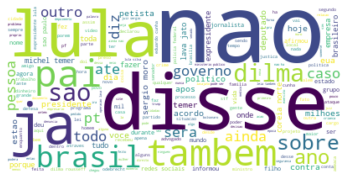

In [11]:
fake_wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_fake))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")

#### True

(-0.5, 399.5, 199.5, -0.5)

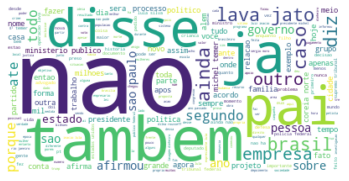

In [12]:
true_wordcloud = WordCloud(max_words=1000, background_color="white").generate(" ".join(list_of_words_true))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis("off")

### Bar Plots

In [13]:
fake_counter = pd.DataFrame.from_dict(Counter(list_of_words_fake), orient='index')
fake_counter = fake_counter.reset_index()
fake_counter = fake_counter.rename(columns={'index': 'word', 0: 'count'})
fake_counter = fake_counter.sort_values('count', ascending=False).query("word != ''").head(50)

true_counter = pd.DataFrame.from_dict(Counter(list_of_words_true), orient='index')
true_counter = true_counter.reset_index()
true_counter = true_counter.rename(columns={'index': 'word', 0: 'count'})
true_counter = true_counter.sort_values('count', ascending=False).query("word != ''").head(50)

#### Fake

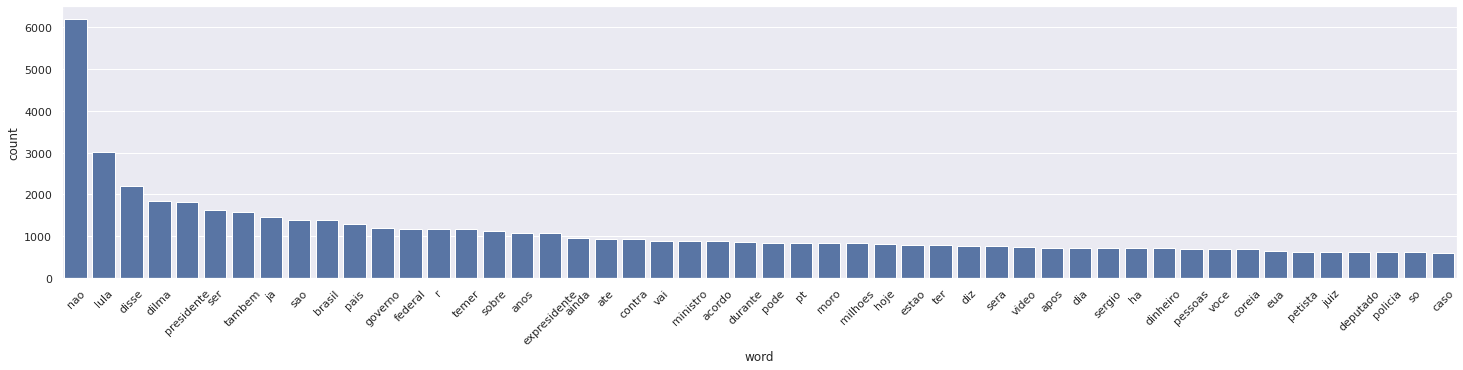

In [20]:
fig = plt.figure(figsize=(25, 5))
g = sns.barplot(x="word", y="count", data=fake_counter, color=sns.color_palette().as_hex()[0])
g = plt.xticks(rotation=45)

#### True

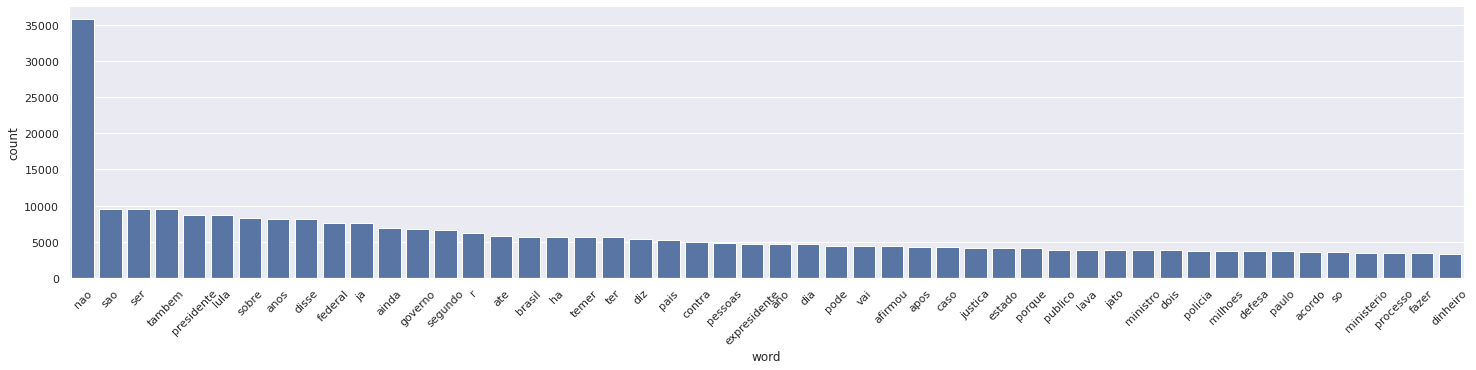

In [21]:
fig = plt.figure(figsize=(25, 5))
g = sns.barplot(x="word", y="count", data=true_counter, color=sns.color_palette().as_hex()[0])
g = plt.xticks(rotation=45)